# Assigenemt-1: Training a Linear Regression Model
 
### Roll Number: BITF20M026
### Name: A1-BITF20M026

##Loading Dataset

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading train and test data files from Google **drive**

In [ ]:

train_df = pd.read_csv('/content/drive/MyDrive/ assignment 1  dataset/Copy of train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ assignment 1  dataset/Copy of test.csv')
train_df.head(10)
test_df.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


Converting dataframes to numpy arrays

In [ ]:
train_df_np = train_df.to_numpy()
print("training data shape:", train_df_np.shape)
test_df_np = test_df.to_numpy()
print("testing data shape:", test_df_np.shape)

training data shape: (699, 2)
testing data shape: (300, 2)


##Training the model
Use normal equation method to compute the optimal parameters for linear regression. Print the values of optimal parameters.


In [ ]:
X = train_df_np
y = train_df_np
def hypo(theta0, theta1, x):
   return (theta0 + theta1 *x)
def cost(theta0, theta1, X, y):
    m = len(y)
    result = 1/(2*m) * np.sum((hypo(theta0, theta1,X)- y)**2)
    return result
theta0_values = np.arange(-0.5, 1.5, 0.2)
theta1_values = np.arange(-0.5, 1.5, 0.2)
min_cost = float('inf')
min_theta0 = None
min_theta1 = None

for theta0 in theta0_values:
    for theta1 in theta1_values:
        result= cost(theta0,theta1, X, y)
        if result < min_cost:
            min_cost = result
            min_theta0 = theta0
            min_theta1 = theta1
print(" theta0 = {}, theta1 = {}".format(min_theta0, min_theta1))
print("Minimum cost: {}".format(min_cost))


 theta0 = 1.3, theta1 = 0.9000000000000001
Minimum cost: 22.08957132471377


# New Section

##Testing the model
Predict the output (y`) for test dataset using the optimal parameters  computed at the previous step.

In [ ]:
theta0 = min_theta0
theta1 = min_theta1
X_test = test_df_np[:, -1] 
y_test = test_df_np[:, -1] 
y_pred = hypo(theta0, theta1, X_test)
for i in range(2):
  print("Predicted hypothesis  y':{} ".format(y_pred[i]))


   

Predicted hypothesis  y':73.09763680900001 
Predicted hypothesis  y':22.159550983000003 


Compute the error using mean squared error function

In [ ]:

X = train_df_np
y = train_df_np

def hypo(theta0, theta1, x):
   return (theta0 + theta1 * x)
    
def MSE(theta0, theta1, X, y):
    m = len(y)
    result = 1/(2*m) * np.sum((y - hypo(theta0, theta1, X))**2)
    return result

theta0_values = np.arange(-0.5, 1.7, 0.2)
theta1_values = np.arange(-0.5, 1.7, 0.2)

min_cost = float('inf')
min_theta0 = None
min_theta1 = None

for theta0 in theta0_values:
    for theta1 in theta1_values:
        result = MSE(theta0, theta1, X, y)
        if result < min_cost:
            min_cost = result
            min_theta0 = theta0
            min_theta1 = theta1
print("theta0 = {}, theta1 = {}".format(min_theta0, min_theta1))
print("Minimum cost through MSE: {}".format(min_cost))



theta0 = 1.5, theta1 = 0.9000000000000001
Minimum cost through MSE: 20.650487818271692


##Visualization
Plotting the actual and predicted answers

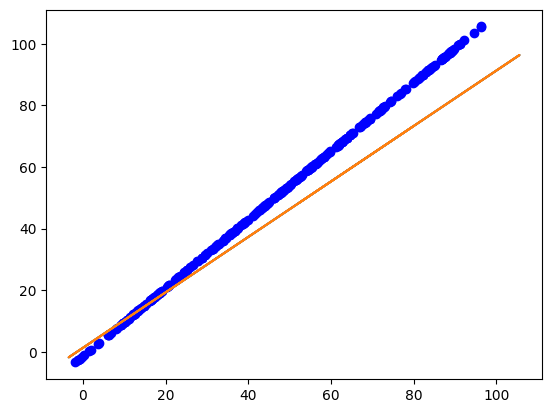

In [ ]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_test, y_pred)
plt.plot(y_test, y_pred)
plt.show()

BONUS TASK:
 gradient descent algorithm: 
 

Cost at iteration 0: 0.9999999999999999
Cost at iteration 100: 0.020024699006603093
Cost at iteration 200: 0.0026030770708875568
Cost at iteration 300: 0.0022728721400819335
Cost at iteration 400: 0.0022463382035643837
Cost at iteration 500: 0.0022253881805433936
Cost at iteration 600: 0.002204727418736213
Cost at iteration 700: 0.0021842601407651096
Cost at iteration 800: 0.002163982897498516
Cost at iteration 900: 0.002143893895428454
Final theta values:
[[0.52022735 0.47721172]
 [0.47721172 0.52533554]]


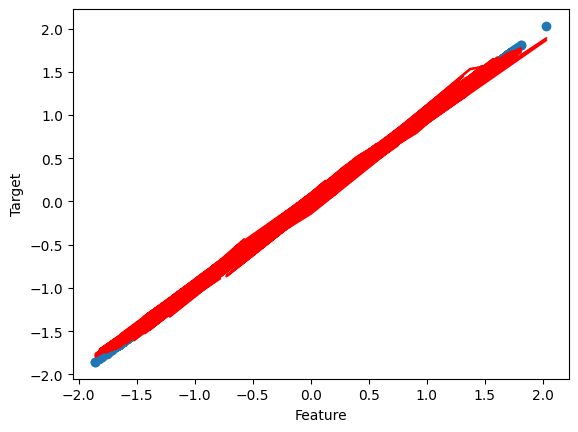

In [ ]:
X = train_df_np
y = train_df_np
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)
theta = 0
learning_rate = 0.01
m = len(y)
for i in range(1000):
    y_pred = np.dot(X, theta)
    d_theta = (1/m) * np.dot(X.T, y_pred - y)
    theta = theta - learning_rate * d_theta
    cost = (1/(2*m)) * np.sum((y_pred - y)**2)
    if i % 100 == 0:
      print(f"Cost at iteration {i}: {cost}")
print("Final theta values:")
print(theta)
plt.scatter(X, y)
plt.plot(X[:, 1], np.dot(X, theta), color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()
